In [1]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# other helpers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

Here's a single neuron with some input, weights, and a bias value. We can also calculate the weighted sum before the value is passed to an activation function. 

In [2]:
x = np.array([0.8, 1.2])   # input features
w = np.array([0.6, -0.1])  # weights
b = 0.1                    # bias
z = np.dot(w, x) + b
print(z)

0.45999999999999996


Activation functions create a non-linear output (excluding step and linear activation) for which a gradient can be calculated. 
Here, we will plot sigmoid, tanh, and ReLU activation function output. 

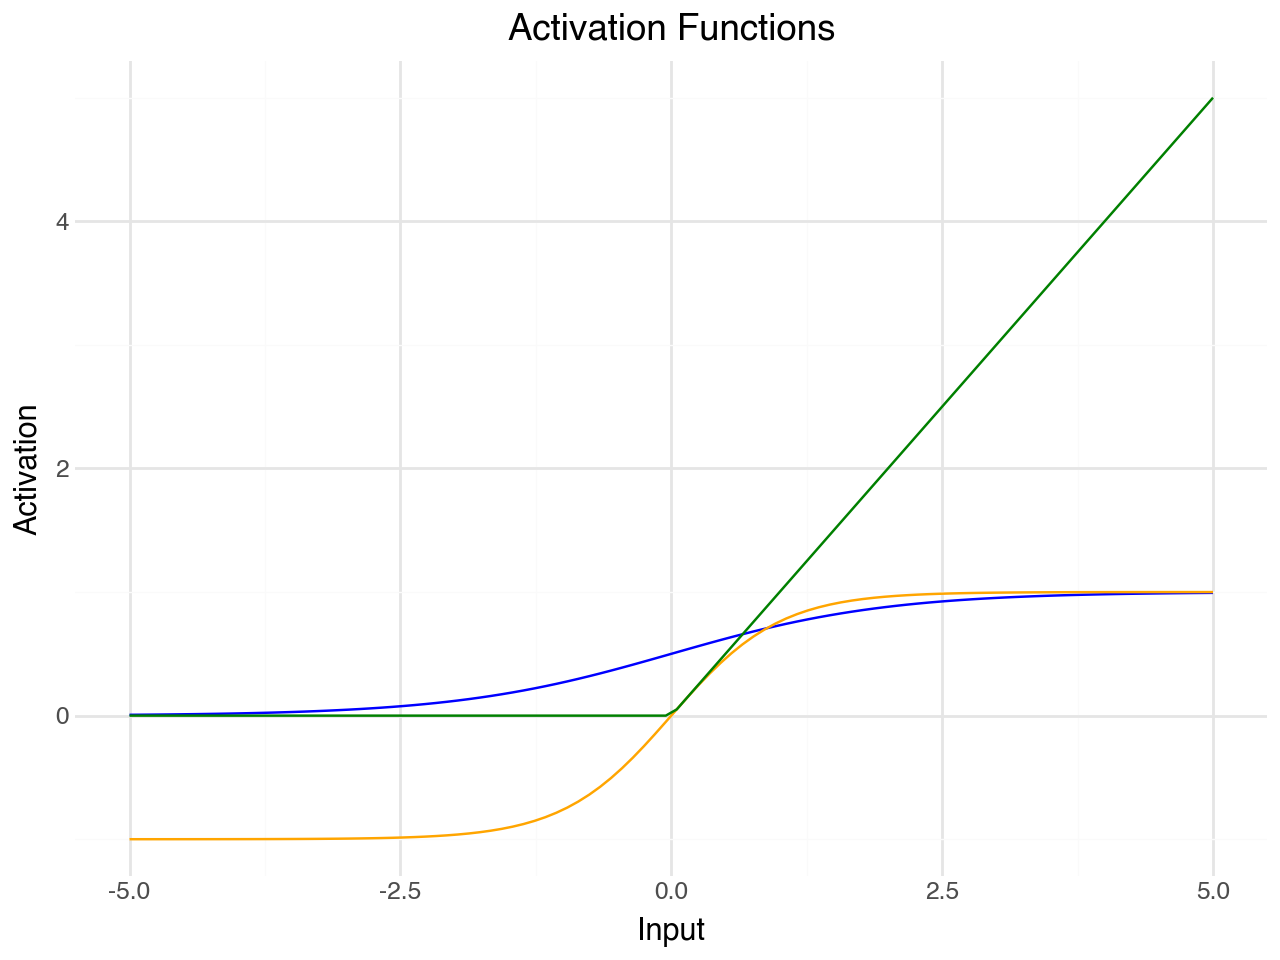

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

x_values = np.linspace(-5,5,100)

df_activations = pd.DataFrame({
    'x':x_values,
    'sigmoid' : sigmoid(x_values),
    'tanh' : tanh(x_values),
    'relu' : relu(x_values) 
})

(
    ggplot(df_activations)+
    geom_line(aes(x='x', y='sigmoid'), color='blue')+
    geom_line(aes(x='x', y='tanh'), color='orange')+
    geom_line(aes(x='x', y='relu'), color='green')+
    labs(title='Activation Functions', x='Input', y='Activation')+
    theme_minimal()
)

Let's train a linear regression model using the building blocks of a neural network implementation. 

When building a neural network, think of the following key items:
- The structure of your model (how many nodes/layers? which activation function to use?)
- The loss function of your model
- The optimizer you will use to train the model (more to come on this)

The input and output layers are determined by your feature space (size and type of input) and the target (what form of output you expect). For a regression problem, your output layer will have a single node. For a multi-class classification, it will be n nodes representing n classes. 

In [4]:
# first we load our data
df = pd.read_csv("https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/refs/heads/master/data/data_moods.csv")
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [5]:
# let's define our feature space and target
# we will predict 'energy' using the other features

features = ['danceability','popularity','length','acousticness','energy','instrumentalness','liveness','valence','loudness','speechiness','tempo']

X = df[features]
y = df['energy']

In [6]:
# let's also standardize our feature space

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building blocks of a neural network in Tensorflow/Keras


#### Model Structure

| **Component**   | **Function / Parameter**                                | **Description**                                              |
| --------------- | ------------------------------------------------------- | ------------------------------------------------------------ |
| **Model**       | `tf.keras.Sequential()` or subclass of `tf.keras.Model` | Container that defines the model architecture.               |
| **Layers**      | `tf.keras.layers.Dense(units, activation)`              | Fully connected layers used to build the model.              |
| **Units**       | `units=...`                                             | Number of neurons in a layer.                                |
| **Activation**  | `activation='relu'`, `'sigmoid'`, `'softmax'`           | Function applied to layer output to introduce non-linearity. |
| **Input Shape** | `input_shape=(...)`                                     | Shape of input data (required in the first layer).           |

#### Compiling

| **Component**     | **Function / Parameter**                    | **Description**                                                          |
| ----------------- | ------------------------------------------- | ------------------------------------------------------------------------ |
| **Compile**       | `model.compile()`                           | Prepares the model for training by setting loss, optimizer, and metrics. |
| **Loss Function** | `loss='mse'`, `'binary_crossentropy'`, etc. | Measures the difference between predictions and actual values.           |
| **Optimizer**     | `optimizer='sgd'`, `'adam'`, etc.           | Algorithm to update weights based on gradients.                          |
| **Metrics**       | `metrics=['accuracy']`, etc.                | List of metrics to evaluate during training/testing.                     |

#### Training and Evaluation

| **Component**  | **Function / Parameter**         | **Description**                                         |
| -------------- | -------------------------------- | ------------------------------------------------------- |
| **Fit**        | `model.fit(X, y, epochs=...)`    | Trains the model using input data and labels.           |
| **Epochs**     | `epochs=...`                     | Number of complete passes through the training data.    |
| **Batch Size** | `batch_size=...`                 | Number of samples processed before model weight update. |
| **Evaluate**   | `model.evaluate(X_test, y_test)` | Tests model performance on new data.                    |
| **Predict**    | `model.predict(X_new)`           | Uses the model to make predictions on new data.         |

#### Other Blocks

| **Component**     | **Function / Parameter**                     | **Description**                                                         |
| ----------------- | -------------------------------------------- | ----------------------------------------------------------------------- |
| **Model Weights** | `model.get_weights()`, `model.set_weights()` | Access or modify model parameters directly.                             |
| **Callbacks**     | `callbacks=[...]`                            | Tools like early stopping, learning rate scheduling, and checkpointing. |


In [7]:
# lets build a simple neural network: one neural, no activation function
model = tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(X_train.shape[1],),
                                                                  activation=None)])

# compile the model
model.compile(optimizer='sgd',loss='mse')
# train the model
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9131  
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8924 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4655 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2121 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1316 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0793 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0560 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0402 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0321 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0272 


During each epoch:  (actually done in batches but we will discuss this later)
- 1. Forward Pass: model makes prediction on X_train observations
- 2. Loss Computation: MSE is calculated between predicted and true values
- 3. Backpropagation: gradients are computed with respect to weights
- 4. SDG Optimizer: updates weights
- 5. Repeat

In [8]:
# print learned weights and bias
weights, bias = model.layers[0].get_weights()
print("Weights:", weights.flatten())
print("Bias:", bias)

Weights: [-0.0043797   0.03014602 -0.00411576 -0.22957477  0.3207798  -0.0321612
 -0.0190662  -0.01118226 -0.23399144 -0.02117471  0.01406751]
Bias: [0.4930379]


In [9]:
# evaluate model
mse = model.evaluate(X_train, y_train, verbose=0)
print("Mean Squared Error on training set:", mse)

mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on training set: 0.02209298498928547
Mean Squared Error on test set: 0.019771670922636986


Let's build a deep neural network - that means adding some hidden layers! Recall that if no activation function is used then all layers combine into a single linear combination. 

In [11]:
# build a deep neural network with multiple layers and activation functions

deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation=None)
])

# compile the model
deep_model.compile(optimizer='sgd',loss='mse')
# train the model
deep_model.fit(X_train,y_train,epochs=30,verbose=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3873  
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2579 
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1875 
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1411 
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1076 
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0862 
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0675 
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0601 
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0556 
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0471 
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0448 
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0376 
Epoch 13/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0382 
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0298 
Epoch 15/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 
Epo

In [ ]:
# evaluate deep_model
mse = deep_model.evaluate(X_train, y_train, verbose=0)
print("Mean Squared Error on training set:", mse)

mse = deep_model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on training set: 0.01991087570786476
Mean Squared Error on test set: 0.019910460337996483


In [15]:
# display the model summary
deep_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (560.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)